# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Now take a look at the shapes of the X and y matricies 

In [35]:
X_train.shape
'''
# amount of 28x28 pictures?
'''

(60000, 28, 28)

In [36]:
y_train.shape

(60000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [48]:
X_train[35999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  16,  29, 154, 254, 243, 135,  25,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  19,  57, 166, 253, 253, 253, 254, 235,  38,  51,   0,
          0,   0],
       [  

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

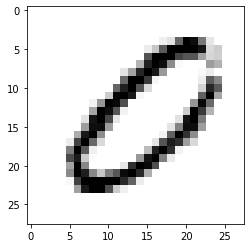

In [43]:
import matplotlib.pyplot as plt
plt.imshow(X_train[35999].reshape(28,28),cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [49]:
y_train[35999]

0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [ ]:
'''
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

if original code worked
then 
x_train = X[:60000]
y_train = y[:60000]
x_test = X[60000:]
y_test = y[60000:]
'''




### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [127]:
# index5train = [i for i in range(len(y_train)) if y_train[i] ==5]
# index5test = [i for i in range(len(y_test)) if y_test[i] ==5]
# y_train5 = [y_train[i] for i in index5train]
# y_test5 = [y_test[i] for i in index5test]
# from sklearn.linear_model import LogisticRegression as lr
# X_train5 = [X_train[i].reshape(28*28,1).reshape(1,-1)[0] for i in range(len(index5train))]
# if5 = lr().fit(X_train5,y_train5)

In [2]:
y_train5 = list(map(lambda x: 1 if x==5 else 0, y_train))
y_test5 = list(map(lambda x: 1 if x==5 else 0, y_test))

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [3]:
from sklearn.linear_model import LogisticRegression as lr
X_train5 = [X_train[i].reshape(28*28,1).reshape(1,-1)[0] for i in range(len(X_train))]

In [57]:
# test = np.array([X_train[i].reshape(28*28,1).reshape(1,-1)[0] for i in range(len(X_train))])
# testtttt = lr().fit(test,y_train5) # try not to use entire dataset to fit your model while you are still testing...
# a = pd.DataFrame(X_train5).head() # try to use fraction of data while testing code
# X_t5 = X_test5[:100]
# y_tt = y_test5[:100]

# # fitting model: features need to be dim2 , aka rows
#         # can either 1). reshape your data (using np.reshape(data, (row #, column #); 
#         #         or 2). convert data into a dataframe (using pd.DataFrame(data)) 
#         # examples as below 
# # testtttt.predict(np.reshape(X_t5[0],(1,784))) # reshape
# testtttt.predict(pd.DataFrame(pd.DataFrame(X_train5).iloc[10]).T) # dataframe option

In [15]:
X_test5 = [X_test[i].reshape(28*28,1).reshape(1,-1)[0] for i in range(len(X_test))]

In [146]:
if5 = lr().fit(X_train5,y_train5)

In [138]:
if5.score(X_train5,y_train5)

0.9783

In [137]:
if5.score(X_test5,y_test5)

0.9773

### Does the classifier predict correctly the 36000th digit we picked before?

In [56]:
if5.predict(np.reshape(X_train5[35999],(1,784)))

array([0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [58]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [93]:
never_5_clf.fit(X_train5[:100],y=y_train5[:100])
never_5_clf.predict(X_test5)
never5 = never_5_clf.predict(X_test_df)

In [94]:
X_test_df = pd.DataFrame(X_test.reshape(10000,784))
df = X_test_df
df['y_test'] = y_test
predict = list(testtttt.predict(X_test_df))
df['predict'] = predict
df['never5_predict'] = list(map(lambda x: 0 if x==False else 1,never5))

In [97]:
df

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,y_test,predict,never5_predict
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,1,0


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [166]:
# confusion matrix

def confusion_Matrix5(y_val, prediction):
    confusion_matrix = []
    if y_val == 5 & prediction == 1:
        confusion_matrix.append('TP')
    elif y_val == 5 & prediction == 0:
        confusion_matrix.append('FN')
    elif y_val != 5 & prediction == 1:
        confusion_matrix.append('FP')
    elif y_val != 5 & prediction == 0:
        confusion_matrix.append('TN')
    
    return confusion_matrix
df['confusion_matrix'] = list(map(confusion_Matrix5, df.y_test, df.predict))

cm = pd.DataFrame(df.confusion_matrix.value_counts())
cmd = dict()
for i in range(len(cm.index)):
    cmd[cm.index[i][0]] = cm.values[i][0]

confusion_matrix_logistics = pd.DataFrame(data=[[cmd['TP'],cmd['FP']],[cmd['FN'],cmd['TN']]],index = ['Predicted_Positive','Predicted_Negative'], columns=['Actual_Positive','Actual_Negative'])

In [165]:
df.rename(columns={'confusion_matrix':'confusion_matrix_logistics'},inplace=True)

In [169]:
df['confusion_matrix_never5'] = list(map(confusion_Matrix5,df.y_test, df.never5_predict))

In [177]:
cm5 = pd.DataFrame(df.confusion_matrix_never5.value_counts())
cm5d = dict()
for i in range(len(cm5.index)):
    cm5d[cm5.index[i][0]] = cm5.values[i][0]

cm5d

{'TN': 9020, 'FN': 980}

In [167]:
confusion_matrix_logistics

,Actual_Positive,Actual_Negative
Predicted_Positive,2,829
Predicted_Negative,973,8196


In [162]:
# precision
precision = confusion_matrix_logistics.Actual_Positive.Predicted_Positive/(confusion_matrix_logistics.Actual_Positive.Predicted_Positive+confusion_matrix_logistics.Actual_Negative.Predicted_Positive)
print('Precision: %f.' % precision)

Precision: 0.002407.


In [151]:
# recall
recall = confusion_matrix_logistics.Actual_Positive.Predicted_Positive/confusion_matrix_logistics.Actual_Positive.values.sum()
print('Recall: %f.' % recall)

Recall: 0.002051.


In [179]:
# f1_scores
f1 = 2*precision*recall/(precision+recall)
print('F1 score: %f.' % f1)

F1 score: 0.002215.


In [ ]:
'''
because there is no TP in never5 prediciton, all metrics are 0
'''

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [188]:
from sklearn.metrics import precision_score, recall_score, f1_score
df['y_test5'] = list(map(lambda x: 1 if x==5 else 0, df.y_test))
precision_py = precision_score(df.y_test5, df.predict)
recall_py = recall_score(df.y_test5, df.predict)
f1_score_py = f1_score(df.y_test5, df.predict)
precision_py_nv5 = precision_score(df.y_test5, df.never5_predict)
recall_py_nv5 = recall_score(df.y_test5, df.never5_predict)
f1_score_py_nv5 = f1_score(df.y_test5, df.never5_predict)
print('precision: %f, recall: %f, f1: %f, precision_nv5: %f, recall_never5: %f, f1_never5: %f.' % (precision_py, recall_py, f1_score_py, precision_py_nv5, recall_py_nv5, f1_score_py_nv5))

precision: 0.900120, recall: 0.838565, f1: 0.868253, precision_nv5: 0.000000, recall_never5: 0.000000, f1_never5: 0.000000.


In [ ]:
'''
logistics model is doing way better
why is my calculation so off...
'''

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

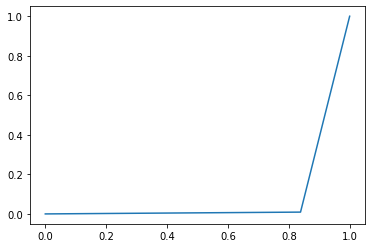

In [218]:
fpr, tpr, thresholds = roc_curve(df.y_test5, df.predict, pos_label=0)
import matplotlib.pyplot as plt
# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

Text(0.5, 1.0, 'never5_predict')

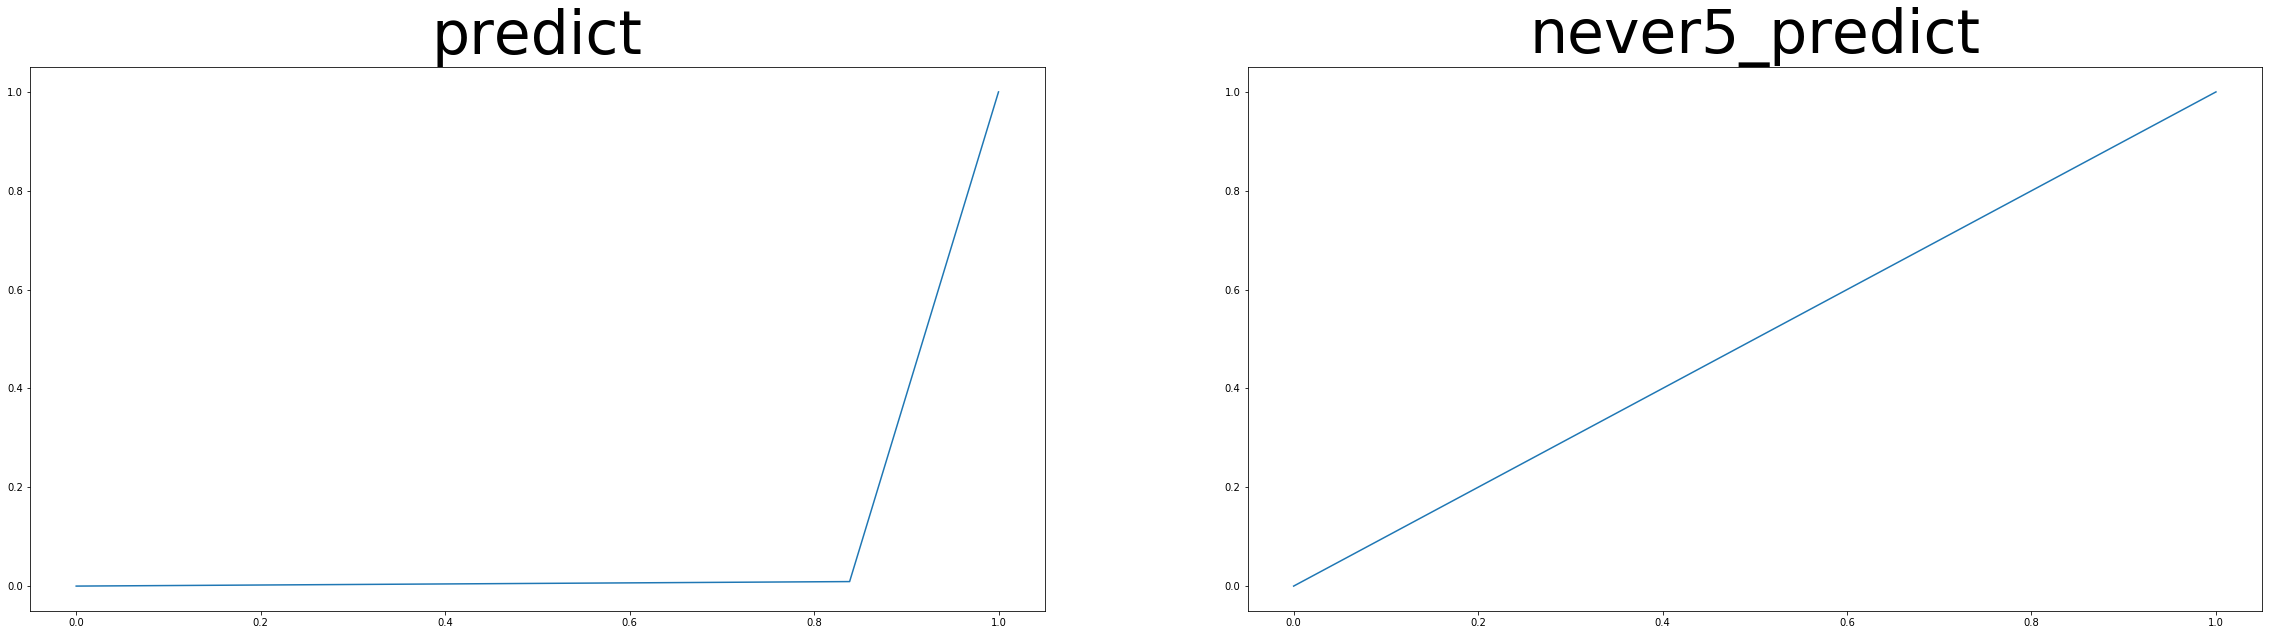

In [233]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df.y_test5, df.predict, pos_label=0)
fpr5, tpr5, thresholds5 = roc_curve(df.y_test5, df.never5_predict, pos_label=0)
fig, ax = plt.subplots(1,2,figsize=(40,10))
sns.lineplot(fpr,tpr, ax=ax[0])
sns.lineplot(fpr5,tpr5, ax=ax[1])
ax[0].set_title('predict',fontsize=60)
ax[1].set_title('never5_predict',fontsize=60)

### Now find the roc_auc_score for each. 

In [235]:
p_score = roc_auc_score(df.y_test5, df.predict)
never5_score = roc_auc_score(df.y_test5, df.never5_predict)
print('Roc_Auc_Score for model predict and never5 are: %f and %f respectively.' % (p_score, never5_score))

Roc_Auc_Score for model predict and never5 are: 0.914726 and 0.500000 respectively.


### What does this metric tell you? Which classifier works better with this metric in mind?